In [1]:
from PIL import Image as pil
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

In [2]:
from keras.preprocessing.image import ImageDataGenerator

import pickle

Using TensorFlow backend.


In [3]:
from torch_arrange import random_weight, zero_weight, flatten, check_accuracy, train

In [4]:
china = np.loadtxt('china.txt', dtype=int)
japan = np.loadtxt('japan.txt', dtype=int)
kor = np.loadtxt('kor.txt', dtype=int)

In [5]:
china = china.reshape(300,3,80,80)
japan = japan.reshape(241,3,80,80)
kor = kor.reshape(272,3,80,80)

In [7]:
len(china)

300

In [11]:
china[0]

array([[[ 54,  49,  49, ..., 211, 152, 105],
        [ 49,  49,  47, ..., 217, 162, 101],
        [ 45,  49,  49, ..., 226, 179, 112],
        ...,
        [ 44,  44,  45, ...,  77,  72,  67],
        [ 42,  44,  41, ...,  68,  68,  63],
        [ 42,  41,  38, ...,  64,  64,  60]],

       [[ 42,  38,  37, ..., 155, 106,  71],
        [ 38,  38,  36, ..., 159, 113,  66],
        [ 33,  38,  39, ..., 165, 128,  75],
        ...,
        [ 42,  42,  43, ...,  72,  68,  64],
        [ 40,  42,  39, ...,  64,  65,  60],
        [ 40,  39,  36, ...,  61,  61,  57]],

       [[ 42,  36,  32, ..., 130,  87,  63],
        [ 38,  35,  31, ..., 133,  93,  56],
        [ 33,  35,  34, ..., 136, 106,  63],
        ...,
        [ 55,  56,  57, ..., 102,  91,  83],
        [ 54,  56,  53, ...,  87,  86,  82],
        [ 54,  52,  50, ...,  81,  83,  79]]])

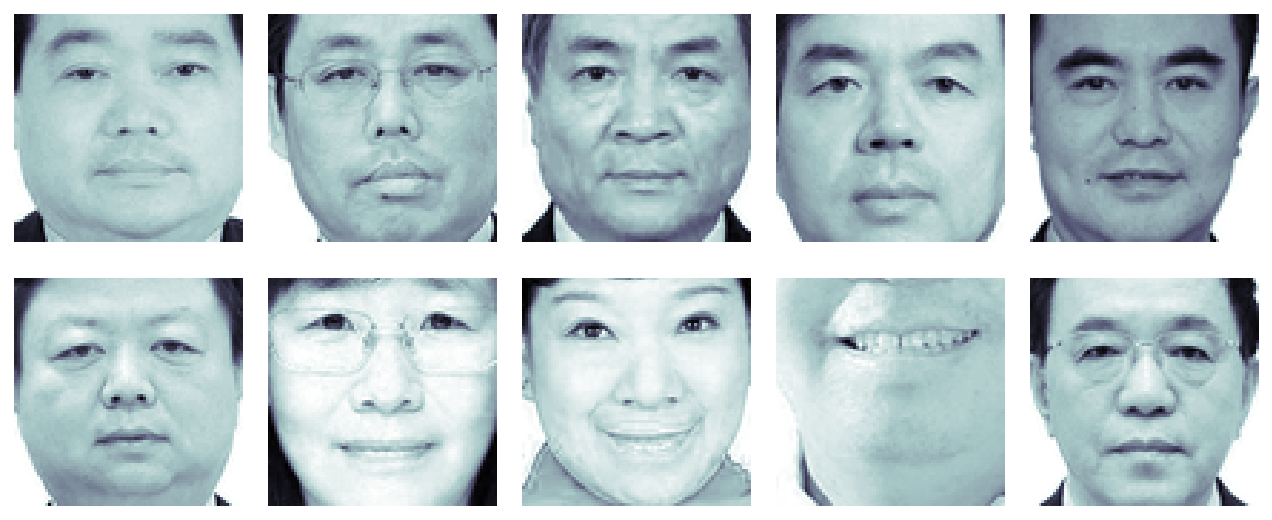

In [12]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(china)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
#         new = china[k].transpose(1,2,0)
#         print(new.shape)
        ax.imshow(china[k][0], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
#         plt.title(faces.target[k])
plt.tight_layout()
plt.show()

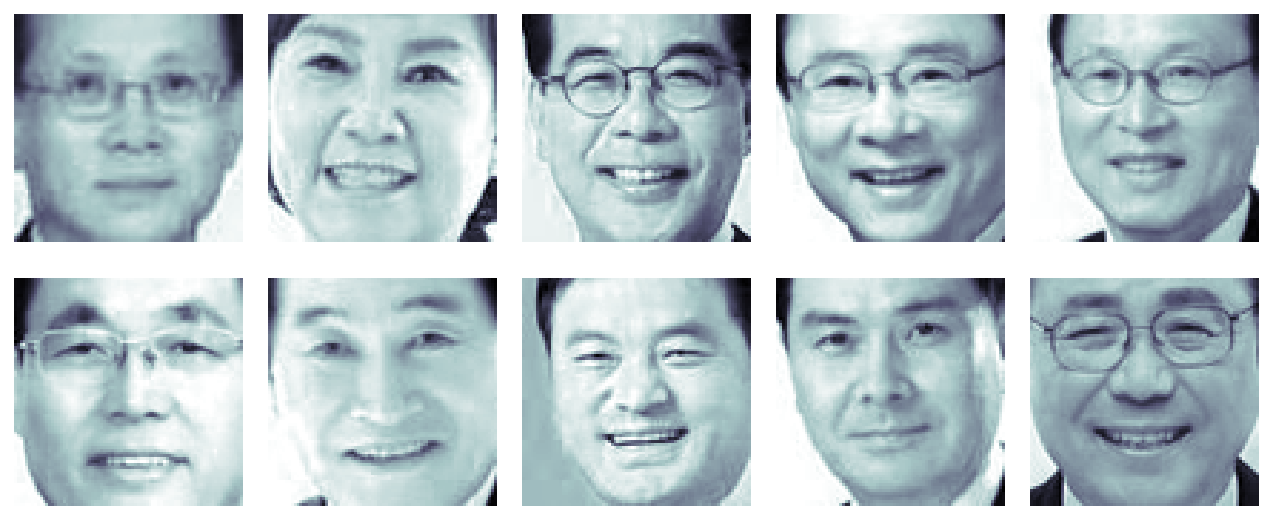

In [13]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(kor)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
#         new = china[k].transpose(1,2,0)
#         print(new.shape)
        ax.imshow(kor[k][0], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
#         plt.title(faces.target[k])
plt.tight_layout()
plt.show()

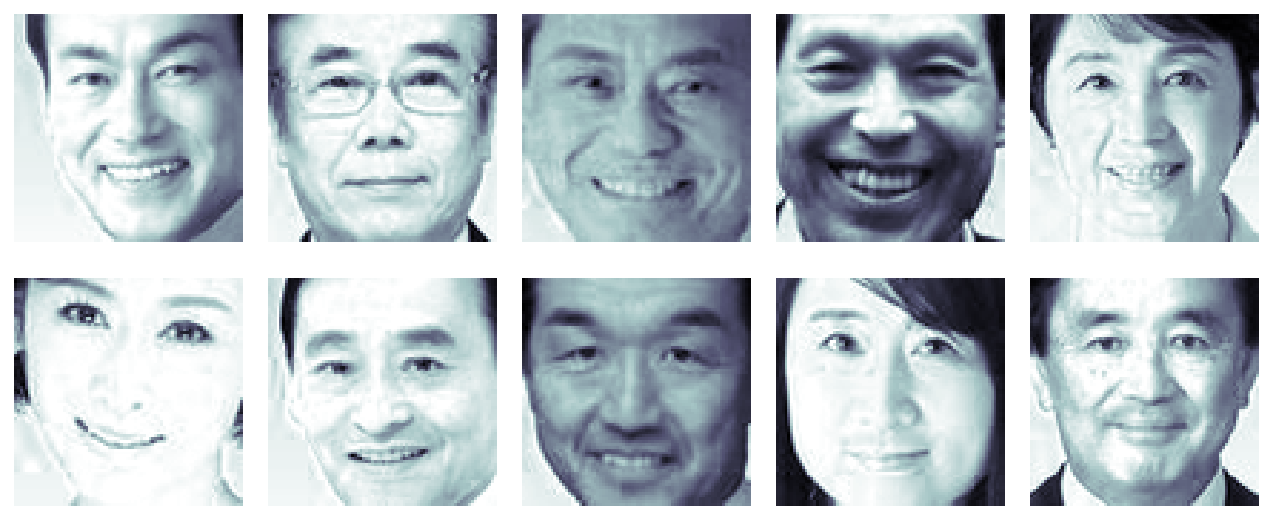

In [14]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(japan)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
#         new = china[k].transpose(1,2,0)
#         print(new.shape)
        #ax.imshow(japan[k][1], cmap=plt.cm.bone)
        ax.imshow(japan[k][0], cmap=plt.cm.bone)
        #ax.imshow(japan[k][2], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
#         plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [ ]:
answer_chn = np.zeros(shape = (300,3), )
answer_chn[:,0] = 1
answer_jpn = np.zeros(shape = (241,3), )
answer_jpn[:,1] = 1
answer_kor = np.zeros(shape = (272,3), )
answer_kor[:,2] = 1

In [ ]:
y = np.vstack((answer_chn,answer_jpn,answer_kor))

In [21]:
y.shape

(813, 3)

In [20]:
y[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [23]:
x = np.vstack((china,japan,kor))
x.shape

(813, 3, 80, 80)

In [24]:
x.shape

(813, 3, 80, 80)

In [25]:
x = np.transpose(x, axes = (0,2,3,1))
x.shape

(813, 80, 80, 3)

# Data Augmentation

The shape of (X_train, X_test, y_train, y_test) are (731, 80, 80, 3) (82, 80, 80, 3) (731, 3) (82, 3)


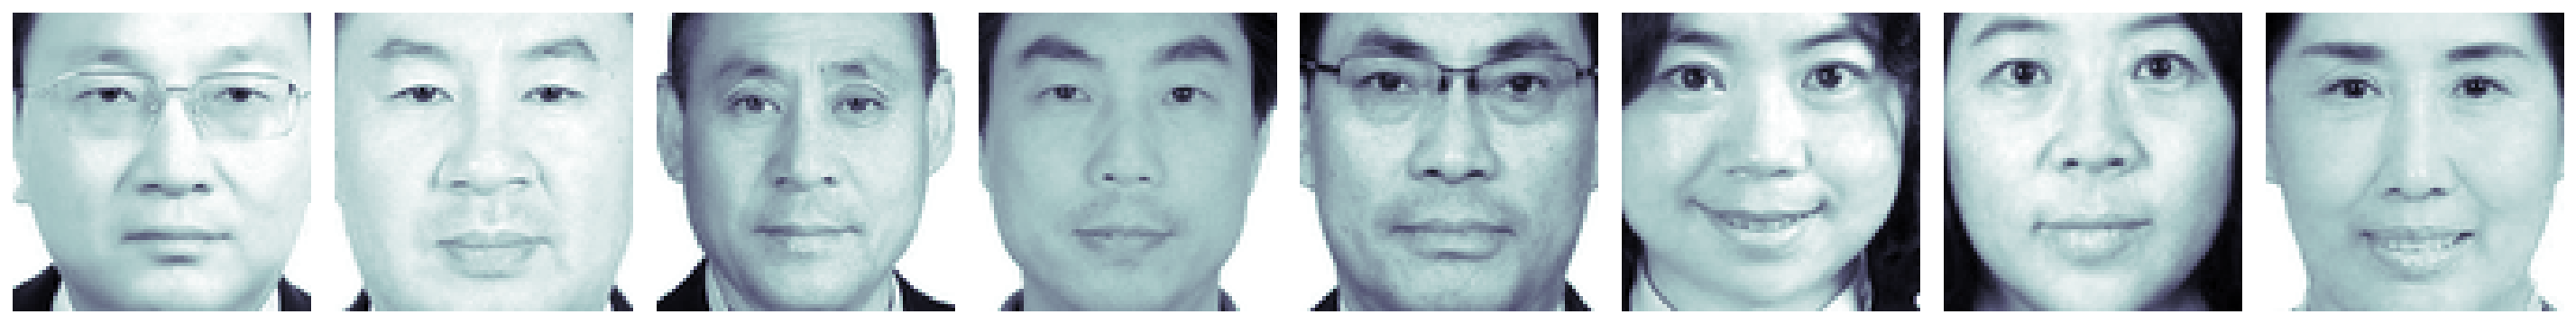

In [27]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

print('The shape of (X_train, X_test, y_train, y_test) are',X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# X_train = X_train0[:, :, :, np.newaxis]
# X_test = X_test0[:, :, :, np.newaxis]
# Y_train = np_utils.to_categorical(y_train0, 40)
# Y_test = np_utils.to_categorical(y_test0, 40)

plt.figure(figsize=(20, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(x[i, :, :, 0], cmap=mpl.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

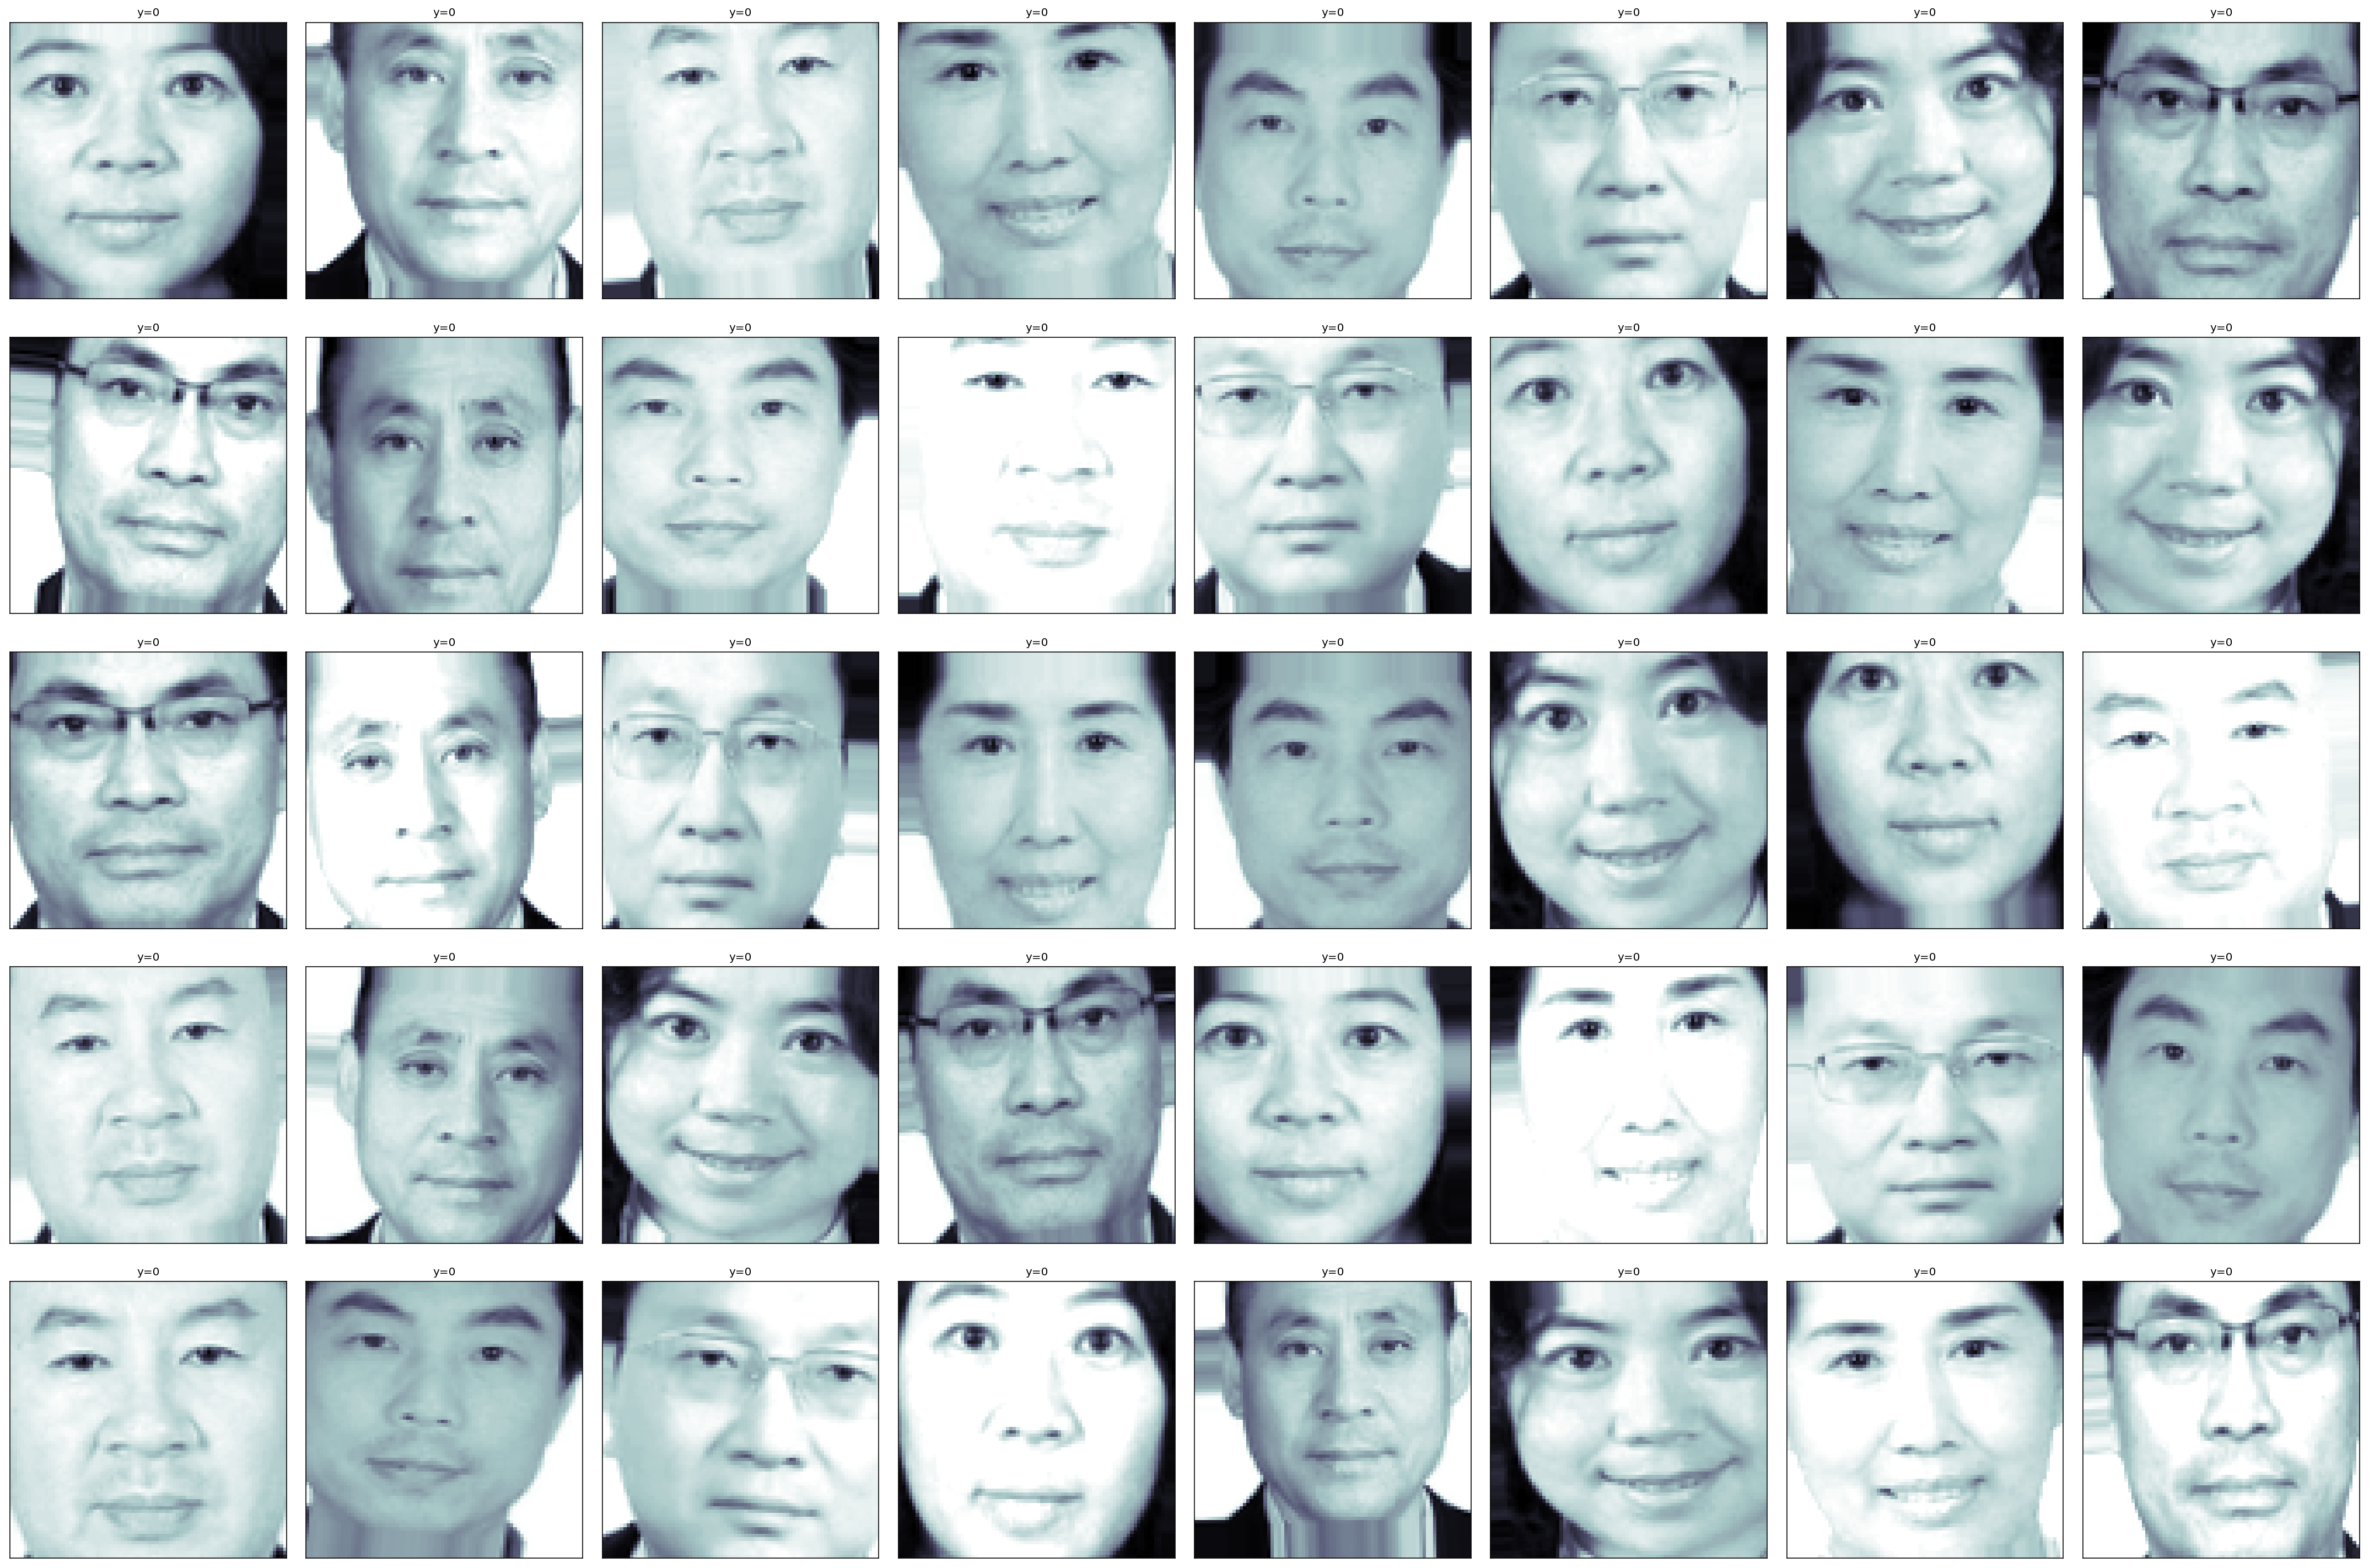

In [207]:
train_generator = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range= 7,
    width_shift_range=0.1,
    height_shift_range =0.1,
    brightness_range=[0.5, 1.3],
    horizontal_flip=True)

train_generator.fit(x)

batch_size = 8
iterator = train_generator.flow(x[:batch_size], y[:batch_size], batch_size=batch_size)

np.random.seed(0)
plt.figure(figsize=(30, 20))
for i in range(int(40 / batch_size)):
    x_augs, y_augs = iterator.next()
    for j in range(batch_size):
        plt.subplot(5, 8, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :,0], cmap=mpl.cm.bone)
        plt.title("y={}".format(np.argmax(y_augs[j, :])), fontsize=10)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

In [208]:
test_generator = ImageDataGenerator()

train_iterator = train_generator.flow(
    X_train, y_train, batch_size=len(x))

N = 30
X_train_new = []
Y_train_new = []
print('X_train.shape is', X_train.shape)
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)

X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

print('Augmented dataset\'s shape is ', X_train_new.shape, Y_train_new.shape)

X_train.shape is (731, 80, 80, 3)
Augmented dataset's shape is  (21930, 80, 80, 3) (21930, 3)


### 데이터를 증가시킨 결과

`훈련데이터 X : (21930, 80, 80, 3)`

`훈련데이터 Y : (21930, 3)`

# Data Preparation for CNN Network


In [209]:
X_train_new = np.transpose(X_train_new, axes = (0,3,1,2))
print('X_train_new.shape : ', X_train_new.shape)
X_test = np.transpose(X_test, axes = (0,3,1,2)) 
print('X_test.shape : ', X_test.shape)


X_train_new.shape :  (21930, 3, 80, 80)
X_test.shape :  (82, 3, 80, 80)


In [178]:
# means = np.mean(X_train_new,axis=(0,2,3),keepdims=True)
# stds = np.std(X_train_new,axis=(0,2,3), keepdims=True)

In [210]:
all_set = np.vstack((X_train_new,X_test))
all_set.shape

(22012, 3, 80, 80)

In [211]:
means = np.array([np.mean(X_train_new[:,0,:,:]),np.mean(X_train_new[:,1,:,:]), np.mean(X_train_new[:,2,:,:])] )
means

array([167.14023 , 133.39897 , 118.541534], dtype=float32)

In [212]:
stds = np.array([np.std(X_train_new[:,0,:,:]),np.std(X_train_new[:,1,:,:]), np.std(X_train_new[:,2,:,:]) ])
stds

array([62.230347, 58.427975, 57.24644 ], dtype=float32)

### Train 데이터 normalization

In [213]:
X_train_new = (X_train_new - means[np.newaxis,:,np.newaxis,np.newaxis])/stds[np.newaxis,:,np.newaxis,np.newaxis]

np.mean(X_train_new[:,0,:,:]), np.std(X_train_new[:,1,:,:])

(-2.5580698e-06, 1.000001)

### Test 데이터 normalization

In [214]:
X_test = (X_test - means[np.newaxis,:,np.newaxis,np.newaxis])/stds[np.newaxis,:,np.newaxis,np.newaxis]
np.mean(X_test[:,0,:,:]), np.std(X_test[:,0,:,:])

(0.32470161731988595, 0.8817931612694788)

In [184]:
X_test.shape, y_test.shape

((82, 3, 80, 80), (82, 3))

### Dataloader
    F.cross_entropy(scores, y) 사용할 때, 정답 y의 shape이 (N,)이길 기대한다.
    따라서, TensorDataset(x,y)에 넣기 전에 정답의 y를 OHE에서 정답 클래스의 indices로 변경한다.

In [276]:
Y_train_new = pd.DataFrame(Y_train_new)
Y_train_new['ans'] = 1
Y_train_new.loc[Y_train_new.loc[:,0] == 1.0, 'ans'] = 0
Y_train_new.loc[Y_train_new.loc[:,1] == 1.0, 'ans'] = 1
Y_train_new.loc[Y_train_new.loc[:,2] == 1.0, 'ans'] = 2


Y_train_new.drop(columns=[0,1,2],axis=1, inplace=True)
print(Y_train_new.head())

Y_train_new = np.array(Y_train_new)
Y_train_new.shape

,0,1,2,ans
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [286]:
y_test = pd.DataFrame(y_test)
y_test['ans'] = 1
y_test.loc[y_test.loc[:,0] == 1.0, 'ans'] = 0
y_test.loc[y_test.loc[:,1] == 1.0, 'ans'] = 1
y_test.loc[y_test.loc[:,2] == 1.0, 'ans'] = 2

print(y_test.head())

y_test.drop(columns=[0,1,2],axis=1, inplace=True)
y_test.head()

y_test = np.array(y_test)
y_test.shape

,0,1,2,ans
0,0.0,0.0,1.0,2
1,1.0,0.0,0.0,0
2,1.0,0.0,0.0,0
3,0.0,1.0,0.0,1
4,1.0,0.0,0.0,0


In [304]:
Y_train_new = Y_train_new.reshape(-1)
y_test = y_test.reshape(-1)

    pickle로 베이스 모델 구성할 데이터 저장

In [345]:
if SAVED == False:
    fname_Xaug = 'Xaug.pkl'
    fname_Yaug = 'Yaug.pkl'
    fname_Xtest = 'Xtest.pkl'
    fname_Ytest = 'Ytest.pkl'
    pickle.dump(X_train_new, open(fname_Xaug,'wb'),)
    pickle.dump(Y_train_new, open(fname_Yaug,'wb'),)
    pickle.dump(X_test, open(fname_Xtest,'wb'),)
    pickle.dump(y_test, open(fname_Ytest,'wb'),)
    SAVED = True
else :
    pass

        DataLoader(TensorDataset(x,y), **args)로 데이터 준비

In [4]:
LOADED = False
if LOADED == False:
    fname_Xaug = 'Xaug.pkl'
    fname_Yaug = 'Yaug.pkl'
    fname_Xtest = 'Xtest.pkl'
    fname_Ytest = 'Ytest.pkl'
    X_train_new = pickle.load(open(fname_Xaug,'rb'),)
    Y_train_new = pickle.load(open(fname_Yaug,'rb'),)
    X_test = pickle.load(open(fname_Xtest,'rb'),)
    y_test = pickle.load(open(fname_Ytest,'rb'),)
    LOADED = True
else :
    pass

In [7]:
a = torch.from_numpy(X_train_new) 
b = torch.from_numpy(Y_train_new)
train_data = TensorDataset(a, b)

NUM_TRAIN = 20000
train_loader = DataLoader(train_data,batch_size= 64, sampler = sampler.SubsetRandomSampler(range(NUM_TRAIN)))
val_loader = DataLoader(train_data,batch_size= 64, sampler = sampler.SubsetRandomSampler(range(NUM_TRAIN,21930)))

c = torch.from_numpy(X_test) 
d = torch.from_numpy(y_test)
test_data = TensorDataset(c, d)
test_loader = DataLoader(test_data,batch_size= 64)

### device 설정, print 주기 설정

In [8]:
USE_GPU = True
if USE_GPU == True and torch.cuda.is_available() == True :
    device = torch.device('cuda')
else : 
    device = torch.device('cpu')
    
dtype = torch.float32
print_every = 100
print('device is ', device)

device is  cpu


# model
     A 4-layer convolutional network
    (conv -> batchnorm -> relu -> maxpool) * 3 -> fc

In [9]:
def random_weight(shape):
    """
    Create random Tensors for weights; setting requires_grad=True means that we
    want to compute gradients for these Tensors during the backward pass.
    We use Kaiming normalization: sqrt(2 / fan_in)
    """
    if len(shape) == 2:  # FC weight
        fan_in = shape[0]
    else:
        fan_in = np.prod(shape[1:]) # conv weight [out_channel, in_channel, kH, kW]
    # randn is standard normal distribution generator. 
    w = torch.randn(shape, device=device, dtype=dtype) * np.sqrt(2. / fan_in)
    w.requires_grad = True
    return w

def zero_weight(shape):
    return torch.zeros(shape, device=device, dtype=dtype, requires_grad=True)

# create a weight of shape [3 x 5]
# you should see the type `torch.cuda.FloatTensor` if you use GPU. 
# Otherwise it should be `torch.FloatTensor`
random_weight((3, 5))

tensor([[-1.3014, -0.6146,  1.1923, -0.3680, -1.6755],
        [ 1.1256,  0.9789,  1.0945, -0.2724,  0.3425],
        [ 0.8837,  1.1714,  1.2370, -0.1701,  0.7728]], requires_grad=True)

In [12]:
layer1 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=5, padding=2),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2)
)

layer2 = nn.Sequential(
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2)
)

layer3 = nn.Sequential(
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2)
)

fc = nn.Linear(64*10*10, 3)


def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d :
        random_weight(m.weight.size())
        zero_weight(m.bias.size())
        

model = nn.Sequential(
    layer1,
    layer2,
    layer3,
    Flatten(),
    fc
)
model.apply(init_weights)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Flatten()
  (4): Linear(in_features=6400, out_features=3, bias=True)
)

In [11]:
def flatten(x):
    '''input : x --> return flattened x'''
    N = x.shape[0]
    return x.view(N,-1)
class Flatten(nn.Module):
    def forward(self,x):
        return flatten(x)

In [16]:
def check_accuracy(loader, model, data = 'val'):
    if data == 'val':
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    y_actu = []
    y_pred = []
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            if data != 'val':
                y_pred.append(preds)
                y_actu.append(y)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        
    return y_actu, y_pred

In [14]:
def train(model, optimizer, epochs=1):
    model = model.to(device=device)  
    for e in range(epochs):
        for t, (x, y) in enumerate(train_loader):
            model.train()  
            x = x.to(device=device, dtype=dtype)  
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)

            loss = F.cross_entropy(scores, y)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy(val_loader, model)
                print()

# 훈련

In [15]:
learning_rate = 1e-3

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Print training status every epoch: set print_every to a large number
print_every = 100


train(model,optimizer,epochs=3)

Iteration 0, loss = 1.2017
Checking accuracy on validation set
Got 718 / 1930 correct (37.20)

Iteration 100, loss = 0.5768
Checking accuracy on validation set
Got 1300 / 1930 correct (67.36)

Iteration 200, loss = 0.5026
Checking accuracy on validation set
Got 1623 / 1930 correct (84.09)

Iteration 300, loss = 0.3214
Checking accuracy on validation set
Got 1653 / 1930 correct (85.65)

Iteration 0, loss = 0.4242
Checking accuracy on validation set
Got 1684 / 1930 correct (87.25)

Iteration 100, loss = 0.2389
Checking accuracy on validation set
Got 1691 / 1930 correct (87.62)

Iteration 200, loss = 0.2224
Checking accuracy on validation set
Got 1801 / 1930 correct (93.32)

Iteration 300, loss = 0.1940
Checking accuracy on validation set
Got 1768 / 1930 correct (91.61)

Iteration 0, loss = 0.1403
Checking accuracy on validation set
Got 1810 / 1930 correct (93.78)

Iteration 100, loss = 0.1748
Checking accuracy on validation set
Got 1824 / 1930 correct (94.51)

Iteration 200, loss = 0.192

# 결과 시각화

In [17]:
from pycm import *

y_actu, y_pred = check_accuracy(test_loader, model, data = 'test')

Checking accuracy on test set
Got 72 / 82 correct (87.80)


In [238]:
y_actu[-18:], y_pred[-18:]

(array([2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2]),
 array([2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2]))

In [ ]:
y_actu[0] = y_actu[0].numpy()
y_actu[1] = y_actu[1].numpy()
y_actu = np.hstack((y_actu[0],y_actu[1]))

y_pred[0] = y_pred[0].numpy()
y_pred[1] = y_pred[1].numpy()
y_pred = np.hstack((y_pred[0],y_pred[1]))

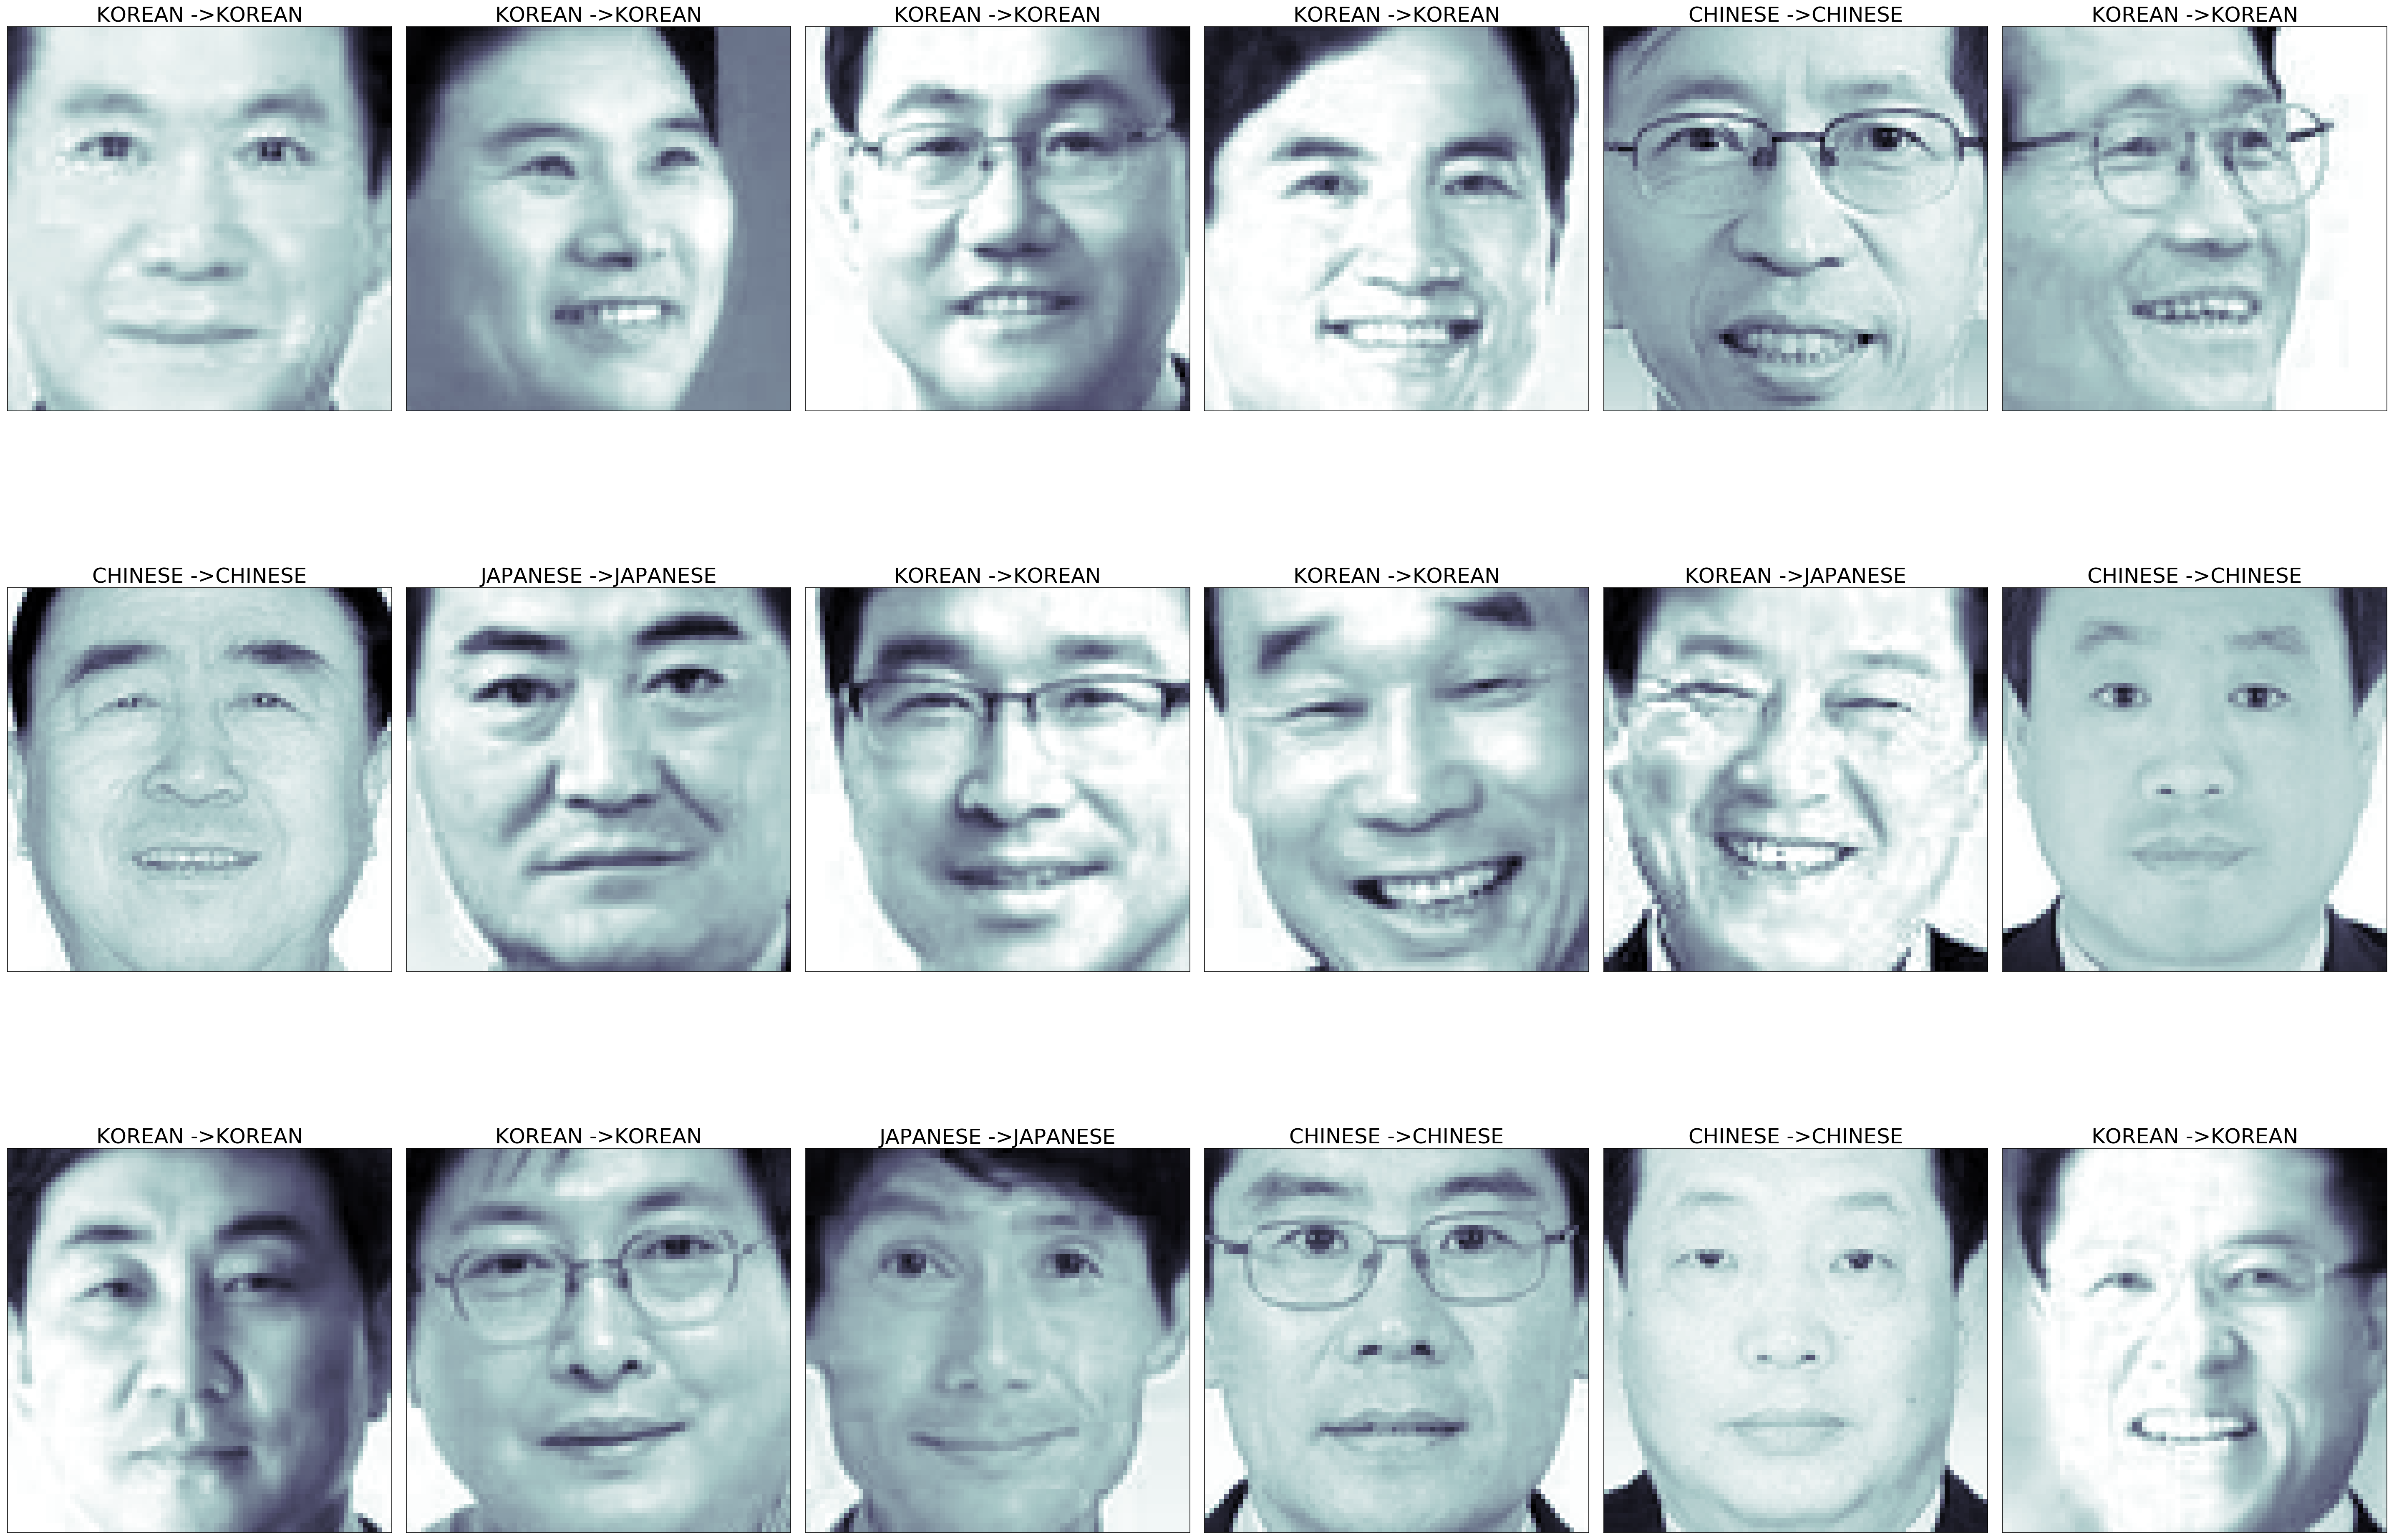

In [246]:
cls2ethnicity = {0:'CHINESE', 1:'JAPANESE', 2:'KOREAN'}

plt.figure(figsize=(40, 30))
for i,(x_mb,y_mb) in enumerate(test_loader):
#     print(x,y)
    if i == 1 :
        for j,(x,y) in enumerate(zip(x_mb,y_mb)):
            plt.subplot(3, 6, j + 1)
#             print(x.shape)
            plt.imshow(x[0, :, :], cmap=mpl.cm.bone)
            plt.grid(False)
            plt.xticks([])
            plt.yticks([])

            plt.title('%s' % cls2ethnicity[y_actu[-18:][j]] +' ->' + cls2ethnicity[y_pred[-18:][j]], fontsize=25)
    else :
        continue
plt.tight_layout()
plt.show()

# 결과 통계치 

In [36]:
cm = ConfusionMatrix(actual_vector=y_actu, predict_vector=y_pred)

cm.relabel(mapping={0:"중국인",1:"일본인",2:"한국인"})
cm.table

{0: {0: 28, 1: 0, 2: 0},
 1: {0: 2, 1: 21, 2: 1},
 2: {0: 2, 1: 5, 2: 23},
 '일본인': {'일본인': 21, '중국인': 2, '한국인': 1},
 '중국인': {'일본인': 0, '중국인': 28, '한국인': 0},
 '한국인': {'일본인': 5, '중국인': 2, '한국인': 23}}

## Printing Confusion Matrix

In [37]:
print(cm)

Predict          중국인    일본인    한국인    
Actual
일본인              21     2      1      

중국인              0      28     0      

한국인              5      2      23     





Overall Statistics : 

95% CI                                                           (0.80722,0.94888)
AUNP                                                             0.91024
AUNU                                                             0.91036
Bennett S                                                        0.81707
CBA                                                              0.81645
Chi-Squared                                                      111.48846
Chi-Squared DF                                                   4
Conditional Entropy                                              0.55312
Cramer V                                                         0.8245
Cross Entropy                                                    1.59707
Gwet AC1                                                         0.81733

# Test for actual sample data

In [40]:
means = np.array([167.14023 , 133.39897 , 118.541534])

stds = np.array([62.230347, 58.427975, 57.24644 ])

In [46]:
friends = np.loadtxt('friends.txt', dtype=int)

friends = friends.reshape(4,3,80,80)

In [48]:
friends_ = np.copy(friends)

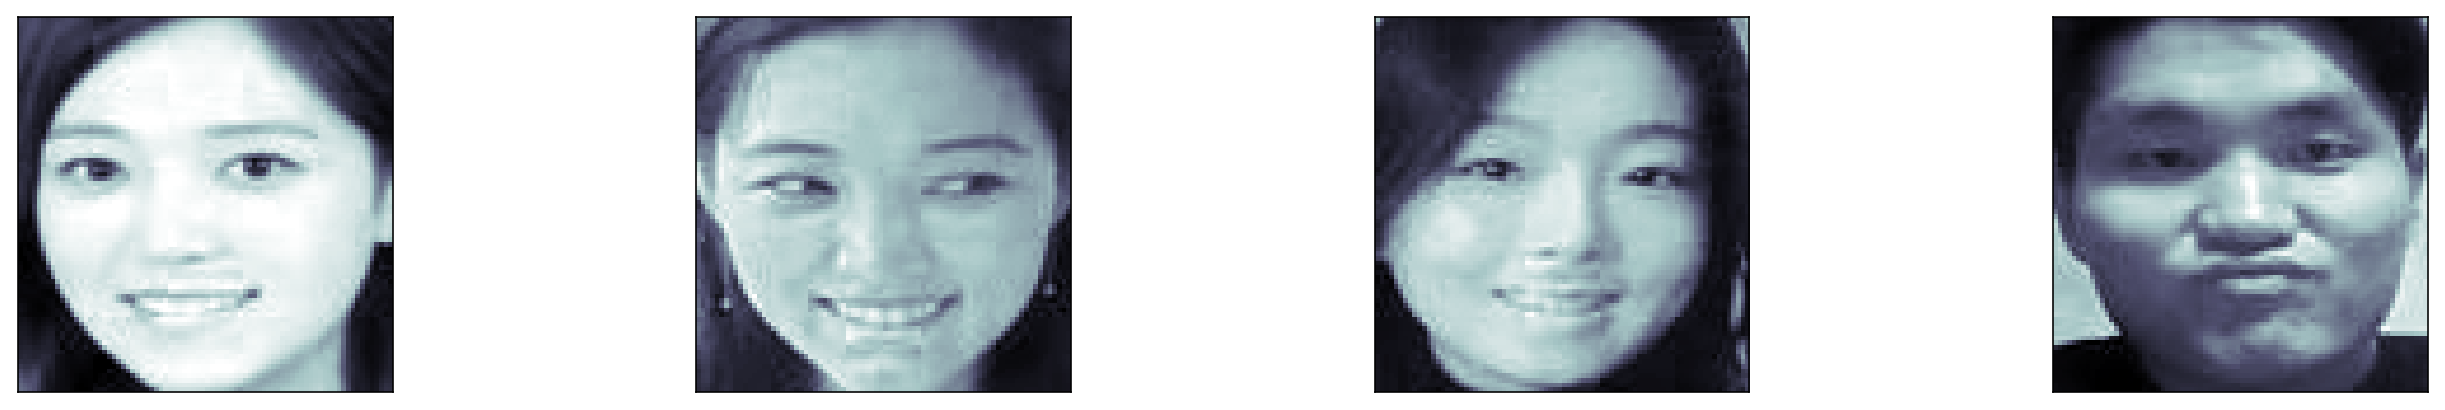

In [49]:
plt.figure(figsize=(20, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(friends_[i, 0, :, :], cmap=mpl.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [50]:
friends_ = (friends_ - means[np.newaxis,:,np.newaxis,np.newaxis])/stds[np.newaxis,:,np.newaxis,np.newaxis]
np.mean(friends_[:,0,:,:]), np.std(friends_[:,0,:,:])

(-0.3838912086574096, 1.1271399802372388)

In [ ]:
friends_ = torch.from_numpy(friends_)

cls2ethnicity = {0:'CHINESE', 1:'JAPANESE', 2:'KOREAN'}
friends_ = friends_.to(device=device, dtype=dtype)
scores = model(friends_)
_, preds = scores.max(1)
preds = preds.numpy()

result = []
for idx,cls in enumerate(preds):
    result.append(cls2ethnicity[cls])
result

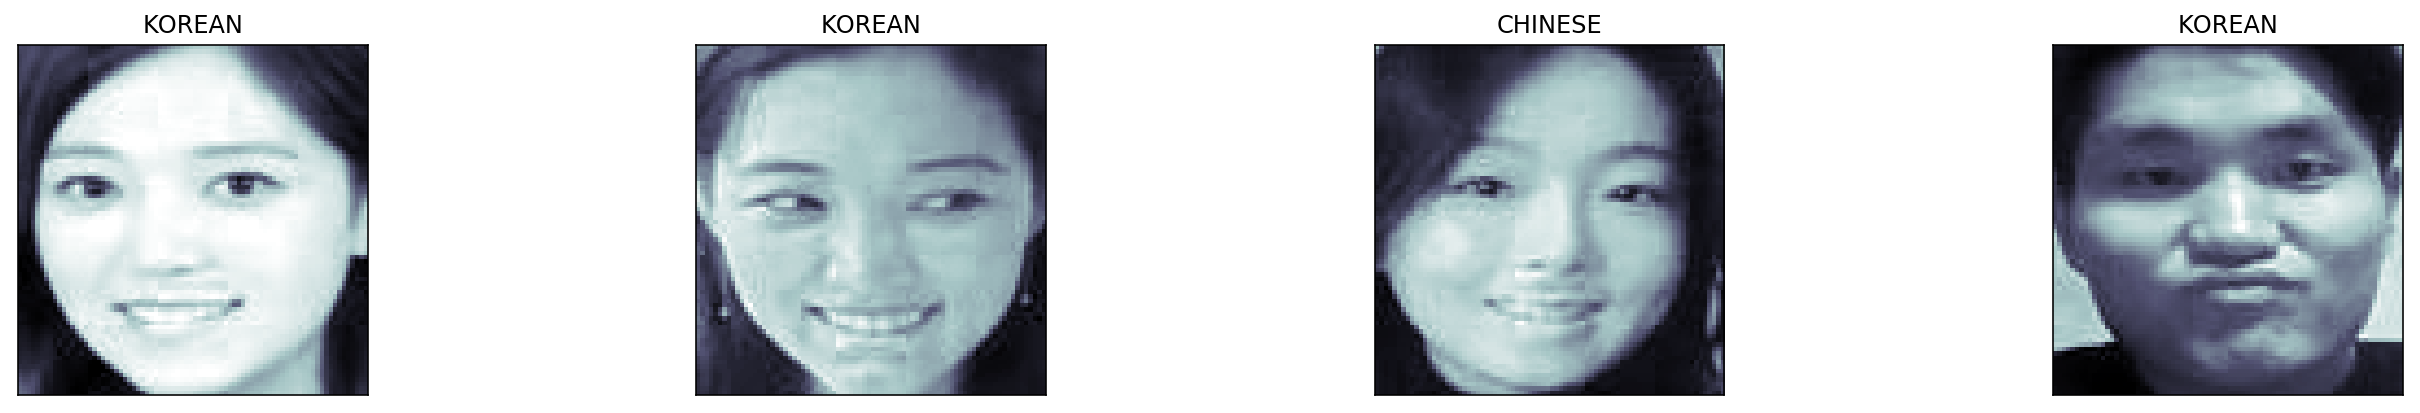

In [67]:
plt.figure(figsize=(20, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(friends_[i, 0, :, :], cmap=mpl.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('%s'% result[i])
plt.tight_layout()
plt.show()

### 네 명의 한국인에 대하여 75%의 accuracy를 보여줌
### 결론: Training된 CNN의 훈련 데이터는 연령대가 대부분 40대 이상의 정치인들이고 성별도 대부분이 남자이기 때문에 젊은 여성의 샘플에 대해 정확한 분류 결과를 보이지 않았다고 판단